<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF_2_0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0
import tensorflow as tf
print(tf.__version__)


2.0.0


In [25]:
#other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [27]:
#Make the dataset
N = 1000
X = np.random.random((N,2))* 6 - 3 #uniformly distributed between (-3,+3) (la función Genera números aleatorios entre 0 y 1)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) #como es N, 2 dimensiones, solo puedo sacar [:,0] y [:,1]

this implements the function:
    \y= cos(2x1) + cos(3x2) 

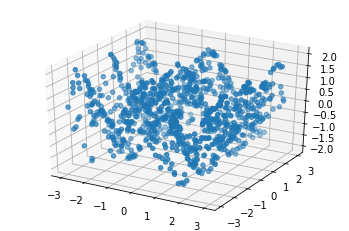

In [28]:
#Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d') #esto es el tipo de plano (el 111 es que solo existe 1 row , 1 column  y esta situado en el 1 xk es el único puede ser 212,222, etc)
ax.scatter(X[:,0], X[:,1], Y) #aquí traes los puntos
# plt.show()

In [29]:
#Build the model
model = tf.keras.models.Sequential([ #el input_shape juega con las entradas, asi que el 2 significa el número de neuronas de las dimensiones sin contar el input layer
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'), #en el input shape (30,4,10) significa 3 dimensiones, el primero de 30 neuronas, el 2 de 4 y el 3 de 10
  tf.keras.layers.Dense(1) # si uno busca tener una configuración específica, entonces es posible usar batch_shape(30,50,50,3)
]) #hideen layer 1 with input + output layer

In [30]:
#compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X,Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 861us/sample - loss: 0.9744
Epoch 2/100
1000/1000 [==============================] - 0s 63us/sample - loss: 0.9479
Epoch 3/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.9232
Epoch 4/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.9031
Epoch 5/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.8746
Epoch 6/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.8134
Epoch 7/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.7664
Epoch 8/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.7985
Epoch 9/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.7284
Epoch 10/100
1000/1000 [==============================] - 0s 69us/sample - loss: 0.6463
Epoch 11/100
1000/1000 [==============================] - 0s 68us/sample - loss: 0.6286
Epoch 12/100
1000/

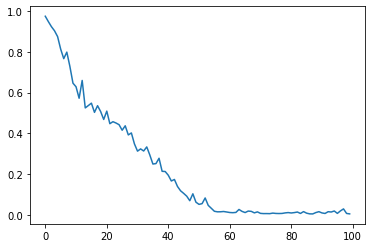

In [31]:
plt.plot(r.history['loss'], label = 'loss')

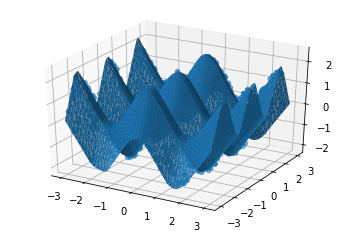

In [36]:
#Plot the predition surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-3,3,50) #correr numeros en intervalo -3 a 3 y que sean 50 muestrasX [Para formato]
xx, yy = np.meshgrid(line,line)  #regresa matrices desde vectores [par aformato]
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T #de tenernos vertical pasa a horizontal (array)
Yhat = model.predict(Xgrid).flatten() #El flatten lo colapsa a una dimension 
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

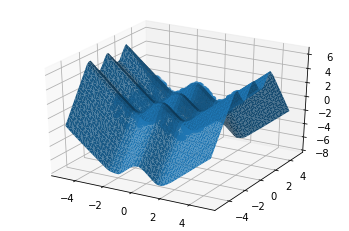

In [40]:
#Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-5,5,50) #solo cambio a de -5 a 5
xx, yy = np.meshgrid(line,line)  #regresa matrices desde vectores [par aformato]
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T #de tenernos vertical pasa a horizontal (array)
Yhat = model.predict(Xgrid).flatten() #El flatten lo colapsa a una dimension 
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()